## Chi-Square Test
The Chi-Square Test for Independence is fundamentally different from t-tests. While t-tests compare means of continuous data, the chi-square test examines relationships between categorical variables.

### What is the Chi-square Test for independence
The Chi-Square (x²) Test for Independence determines whether two categorical variables are associated or independent of each other.
Key question: "Are these two categorical variables related, or do they vary independently?"
### When to Use It
* Two categorical variables (not continuous)
* Want to test if variables are associated/related
* Data organized in a contingency table (cross-tabulation)
* Independent observations
### Real world examples:
* Does treatment type affect recovery outcome (Recovered/not covered)
* Does city location affect customer satisfaction level?
* Is smoking status associated with lung disease

### 1) CHI-SQUARE GOODNESS OF FIT
| Face | Observed (O) |
| ---- | ------------ |
| 1    | 8            |
| 2    | 10           |
| 3    | 9            |
| 4    | 12           |
| 5    | 11           |
| 6    | 10           |

* formula 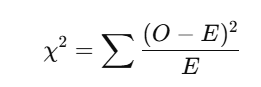
* Degrees of freedom: df = k−1
* Decision

| Face | O  | E  | (O−E)²/E |
| ---- | -- | -- | -------- |
| 1    | 8  | 10 | 0.4      |
| 2    | 10 | 10 | 0        |
| 3    | 9  | 10 | 0.1      |
| 4    | 12 | 10 | 0.4      |
| 5    | 11 | 10 | 0.1      |
| 6    | 10 | 10 | 0        |

* χ2 =1.0

* df = 6 − 1 = 5
* Critical value (α = 0.05) = 11.07
* Since 1 < 11.07 → Fail to reject H₀

In [1]:
import numpy as np
from scipy.stats import chisquare, chi2

# Observed frequencies
observed = np.array([8, 10, 9, 12, 11, 10])

# Expected frequencies
expected = np.array([10, 10, 10, 10, 10, 10])

# Chi-square test
chi_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

df = len(observed) - 1
alpha = 0.05
critical_value = chi2.ppf(1 - alpha, df)

print("Chi-square =", chi_stat)
print("p-value =", p_value)
print("Critical Value =", critical_value)
print("Decision:", "Reject H0" if chi_stat > critical_value else "Fail to Reject H0")


Chi-square = 1.0
p-value = 0.9625657732472964
Critical Value = 11.070497693516351
Decision: Fail to Reject H0


### 2) CHI-SQUARE TEST OF INDEPENDENCE (MOST IMPORTANT)
Used with a contingency table to test whether two categorical variables are independent.

Example : 

Survey of Gender vs Preference:

| Gender | Tea | Coffee | Total |
| ------ | --- | ------ | ----- |
| Male   | 30  | 20     | 50    |
| Female | 10  | 40     | 50    |
| Total  | 40  | 60     | 100   |

* Expected Value Formula: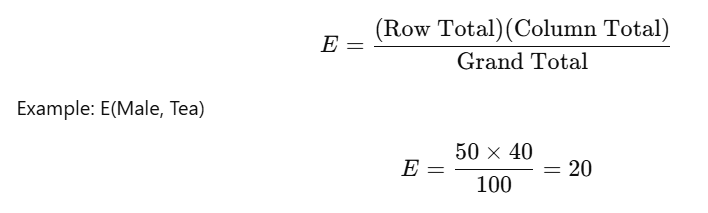
  
|        | Tea | Coffee |
| ------ | --- | ------ |
| Male   | 20  | 30     |
| Female | 20  | 30     |

*Compute (𝑂−𝐸)2/𝐸:

| Cell   | O  | E  | (O−E)²/E |
| ------ | -- | -- | -------- |
| M–Tea  | 30 | 20 | 5        |
| M–Coff | 20 | 30 | 3.33     |
| F–Tea  | 10 | 20 | 5        |
| F–Coff | 40 | 30 | 3.33     |


* Degrees of Freedom : df=(r−1)(c−1)
* Here: (2−1)(2−1) = 1

Critical value (α = 0.05) = 3.84
* 16.66>3.84⇒Reject H₀

In [3]:
import numpy as np
from scipy.stats import chi2_contingency, chi2

# Contingency table: rows = gender, columns = drink
table = np.array([
    [30, 20],  # Male
    [10, 40]   # Female
])

chi_stat, p_value, df, expected = chi2_contingency(table)

alpha = 0.05
critical_value = chi2.ppf(1 - alpha, df)

print("Chi-square:", chi_stat)
print("p-value:", p_value)
print("Degrees of freedom:", df)
print("Expected frequencies:\n", expected)
print("Critical Value:", critical_value)
print("Decision:", "Reject H0" if chi_stat > critical_value else "Fail to Reject H0")


Chi-square: 15.041666666666668
p-value: 0.00010516355403363114
Degrees of freedom: 1
Expected frequencies:
 [[20. 30.]
 [20. 30.]]
Critical Value: 3.841458820694124
Decision: Reject H0
